# <font color=#023F7C> **Data Visualization** </font>

<font color=#023F7C>**Hi! PARIS DataBootcamp 2024 🚀**</font> <br>


<img src = https://www.hi-paris.fr/wp-content/uploads/2020/09/logo-hi-paris-retina.png width = "300" height = "200" >

**Name**: ...           <br>
**School**: ...         <br>
**Group number**: ...    <br>
**Track**: ...

**<font size='4'><u>Goal of this practical session</u>**</font> <br>

The goal of this practical session is create plots using the olympic games data you cleaned during the Data Cleaning practical session. <br>These plots should allow you to discover and visualize interesting patterns in the data.

**<font size='4'><u>What is Data visualization ? 📝</u>**</font> <br>

**Data visualization** is the representation of data and information in graphical or visual formats. <br>
It involves creating visualizations such as charts, graphs, maps, and other visual elements to help understand patterns, trends, and relationships within the data.

Data visualization is a fundamental component of **Exploratory Data Analysis** (EDA). It is often used for:
- **Data Understanding**: Data visualization provides a way to quickly grasp the distribution, central tendency, dispersion, and other key characteristics of the data. By visualizing the data, analysts can detect outliers, gaps, clusters, and potential issues that might not be immediately apparent from the raw data.
- **Pattern Discovery**: Visualizations help to identify patterns and trends that might not be obvious in tabular or raw data formats. Patterns that emerge from visualizations can lead to hypotheses or guide further analysis.
- **Relationship Exploration**: Visualization can reveal relationships between variables, such as correlations or dependencies, which can be vital for understanding how different factors interact with each other.

**<font size='4'><u>Bootcamp deliverables 💯</u>**</font> <br>

Send both the notebooks and the slides at `data-event@hi-paris.fr`

- <u>**Friday 12:30 PM**</u>: <br> **Send us the "Data visualisation" and "Machine Learning, Explainability and Deep Learning" notebooks (no need to send us data cleaning)** 
    - **Each group member should send his own notebooks** (we won't accept one notebook per group)
    - Don't forget to complete the start of the notebook with your information (name, school, group number and track)
    
    <br>
    
- <u>**Friday 2:30PM**</u>: <br>**Send us the group slides**<br>
    - You can send us a single powerpoint per group (no need to send us one per group member)
    - Don't forget to add your group number as well as who is in your group (name, school and track) to the slides

**<font size='4'><u>Before you start to working on this notebook ⚠️</u>**</font> <br>

Please download/copy this notebook from `hfactory_magic_folders\course` and drop it into your own directory `my_work` on HFactory. <br>
If you don't, you won't be able to save the modifications you've made on this notebook.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

pd.set_option("display.max_columns", None)  # Show all columns

## 1. Import the cleaned data




**Question 1:** <br>
**Load the dataframe you cleaned in the `Data_cleaning.ipynb` notebook and saved as `athlete_events_clean.csv`**


*If you haven't finished the data cleaning notebook, please go back to it before starting this practical session. <br> Don't forget to also save the cleaned dataset, as you will need for this session.*

*If you are having **difficulties with data cleaning**, you can run the following two notebook cells loading a clean dataset. <br>
These cells will load the original dataset as `dataset` and clean it using the `data_preparation` and `preparation` functions.<br>*

In [27]:
# Run the following two cells if you don't want to or can't use the dataframe you cleaned in Monday's notebook.


def data_preparation(path=r"data/athlete_events.csv"):
    dataset = pd.read_csv(path)
    dataset["Medal"] = dataset["Medal"].fillna("None")
    dataset = dataset.dropna(subset=["Height", "Weight"]).reset_index(drop=True)
    fill_age = int(dataset["Age"].mean())
    dataset["Age"] = dataset["Age"].fillna(fill_age)
    return dataset


dataset = data_preparation()

In [28]:
def preparation(dataset):
    # dataset = pd.read_csv(r"data/athlete_events.csv")
    regions = pd.read_csv(r"data/noc_regions.csv")
    dataset["Medal"] = dataset["Medal"].fillna("None")
    dataset = dataset.dropna(subset=["Height", "Weight"]).reset_index(drop=True)
    fill_age = int(dataset["Age"].mean())
    dataset["Age"] = dataset["Age"].fillna(fill_age)

    dict_regions = dict(zip(regions["NOC"].to_list(), regions["region"].to_list()))
    countries = dataset["NOC"].map(dict_regions)
    dataset.insert(8, "Country", countries)  ##Add other ? add beter ?
    dict_host_country = {
        "Seoul": "South Korea",
        "Barcelona": "Spain",
        "Atlanta": "USA",
        "Sydney": "Australia",
        "Athina": "Greece",
        "Beijing": "China",
        "Melbourne": "Australia",
        "Los Angeles": "USA",
        "St. Louis": "USA",
        "Moskva": "Russia",
        "Montreal": "Canada",
        "Munich": "Germany",
        "Berlin": "Germany",
        "Mexico City": "Mexico",
        "Tokyo": "Japan",
        "Roma": "Italy",
        "Paris": "France",
        "Helsinki": "Finland",
        "Amsterdam": "Netherlands",
        "Antwerpen": "Belgium",
        "Stockholm": "Sweden",
        "Rio de Janeiro": "Bresil",
        "London": "UK",
    }
    dataset["Host_country"] = dataset["City"].map(dict_host_country)
    dataset["Won_host_country"] = dataset["Host_country"] == dataset["Country"]
    dataset.reset_index(drop=True, inplace=True)
    return dataset


dataset = preparation(dataset)

Don't run the previous three cells if you are using your own cleaned data. <br>
Use the following cell to do so.

In [ ]:
# Load your own clean data


## 2. Create visualization plots

**Question 2**: <br>
**Display the pie chart of the proportion of each unique value of 'Medal' (print the %)** <br>

*<u>Help</u>: Go to https://python-graph-gallery.com/pie-plot/ to find examples of pie plots.* <br>
- *You can use Pandas' `.value_counts()` function to get the proportion of each unique value*
- *You can use the parameter `autopct="%.2f%%"` to get the percentage instead of the count in `plt.pie()`*
- *You can also use pandas' `.plot.pie()` function to plot from a dataframe*

In [4]:
dataset["Medal"].value_counts()

Medal
None      176657
Gold       10168
Bronze     10154
Silver      9874
Name: count, dtype: int64

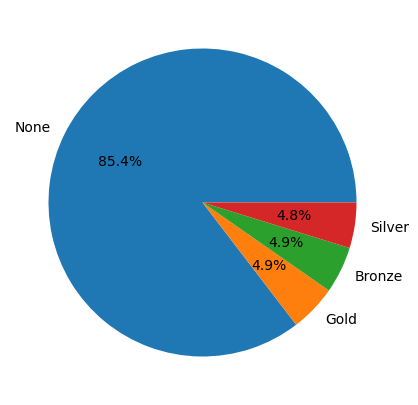

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
plt.pie(
    x=dataset["Medal"].value_counts(),
    labels=dataset["Medal"].value_counts().index,
    autopct="%.1f%%",
)
plt.show()

**Question 3**: <br>
**Print the number of medal for each OG in Summer and after in Winter.**
You can use 'sns.barplot'.

First, you have to create a new column, "has_medal", which is equal to 1 if an athelte won a medal, 0 if not.

(Optional question) : Show the labels of the bars with a 80° degree rotation




In [30]:
dataset["has_medal"] = dataset["Medal"] != "None"
dataset.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Country,Games,Year,Season,City,Sport,Event,Medal,Host_country,Won_host_country,has_medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,Spain,False,False
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,UK,False,False
2,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,NaN,False,False
3,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None,NaN,False,False
4,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None,NaN,False,False


In [99]:
df_sub_events = dataset[
    ["Country", "Games", "Sport", "Event", "Medal", "Won_host_country"]
]
df_sub_events.drop_duplicates()
df_sub_events = df_sub_events[df_sub_events["Medal"] != "None"]
df_sub_events

,Country,Games,Sport,Event,Medal,Won_host_country
30,Finland,2014 Winter,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,False
31,Finland,1948 Summer,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,False
32,Finland,1948 Summer,Gymnastics,Gymnastics Men's Team All-Around,Gold,False
34,Finland,1948 Summer,Gymnastics,Gymnastics Men's Horse Vault,Gold,False
38,Finland,1948 Summer,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,False
...,...,...,...,...,...,...
206816,Russia,1956 Summer,Athletics,Athletics Women's Shot Put,Silver,False
206818,Russia,1964 Summer,Athletics,Athletics Women's Shot Put,Bronze,False
206820,Poland,1980 Summer,Fencing,"Fencing Men's Foil, Team",Bronze,False
206839,Russia,2000 Summer,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,False


In [32]:
summer_medals = (
    dataset[dataset["Season"] == "Summer"]
    .groupby(by="Games")["has_medal"]
    .sum()
    .to_frame()
)
winter_medals = (
    dataset[dataset["Season"] == "Winter"]
    .groupby(by="Games")["has_medal"]
    .sum()
    .to_frame()
)
summer_medals


,has_medal
Games,
1896 Summer,20
1900 Summer,38
1904 Summer,60
1906 Summer,69
1908 Summer,138
1912 Summer,131
1920 Summer,183
1924 Summer,170
1928 Summer,164


<function matplotlib.pyplot.show(close=None, block=None)>

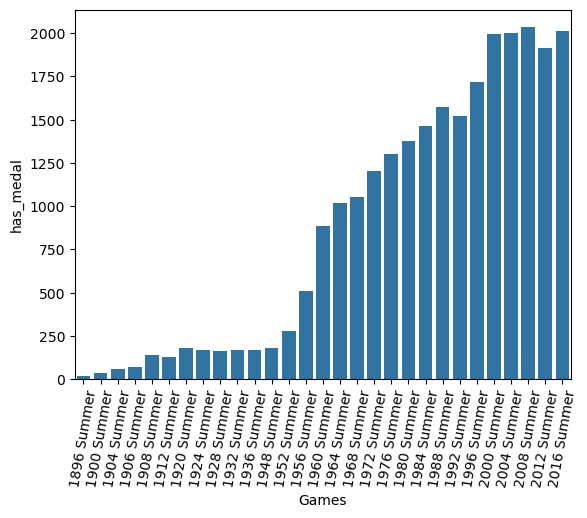

In [37]:
fig = sns.barplot(summer_medals, x=summer_medals.index, y="has_medal")
fig.tick_params(axis="x", rotation=80)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

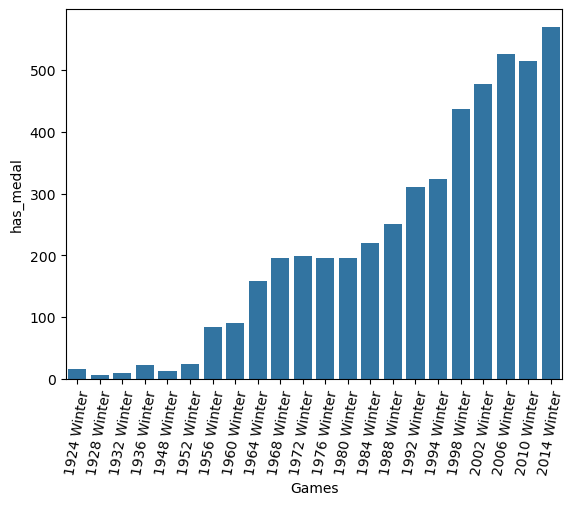

In [36]:
fig = sns.barplot(winter_medals, x=winter_medals.index, y="has_medal")
fig.tick_params(axis="x", rotation=80)
plt.show

**Question 4**: <br>
**Compute the correlation matrix of the numerical variables (int and float) in the dataframe** <br>
**Then display this matrix with `sns.heatmap()`**

*Note: A correlation is high when its above 0.7*
- *You can use `numeric_only=True` to only use the numerical variables in `df.corr()`.*
- *You can use `plt.figure(figsize=(30,20))` to get a larger display of the heatmap.*

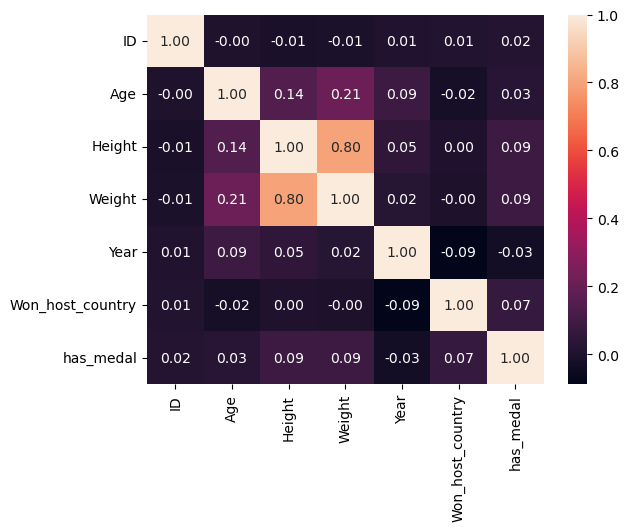

In [48]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

**Did you identify highly correlated variables  ?**



Weight and age seems highly correlated.

**Question 5**: <br>
**Show the average number of medals won when a country hosts the Olympic Games and when it does not.** (No graph needed) <br>
**But for this question, take only the summer Olympics after 1950.**



In [54]:
# keep only summer games post 1950
df_post_1950 = dataset[(dataset["Year"] >= 1950) & (dataset["Season"] == "Summer")]
# keep only host countries
lst_host_countries = df_post_1950[df_post_1950["Won_host_country"] == True][
    "Country"
].unique()
df_host_countries = df_post_1950[df_post_1950["Country"].isin(lst_host_countries)]

# count the medals by Games as a host country
nb_medal_host_country_mean = (
    df_host_countries[
        (df_host_countries["has_medal"] == True)
        & (df_host_countries["Won_host_country"] == True)
    ]
    .groupby(["Country", "Games"])["has_medal"]
    .count()
).mean()

# count the medals by Games as a non host country
nb_medal_non_host_country_mean = (
    df_host_countries[
        (df_host_countries["has_medal"] == True)
        & (df_host_countries["Won_host_country"] == False)
    ]
    .groupby(["Country", "Games"])["has_medal"]
    .count()
).mean()

# Display the results
print(
    f"Host country mean: \t{nb_medal_host_country_mean:.2f} medals\nNon host country mean: \t{nb_medal_non_host_country_mean:04.2f} medals"
)


Host country mean: 	134.56 medals
Non host country mean: 	61.43 medals


**Question 5 bis**: <br>
 Why are the averages so high?



Because there is collective sports

**Question 6** <br>
**For each country, plot the average number of medals won when the country is a host and when it is not.** <br>
**But for this question, take only the summer Olympics after 1950.**

*Use sns.barplot() and the argument 'hue' (You can see the documentation)*

In [83]:
# get the mean of medals won by host countries
avg_host_med = (
    df_host_countries[
        (df_host_countries["has_medal"] == True)
        & (df_host_countries["Won_host_country"] == True)
    ]
    .groupby(["Country", "Games"])["has_medal"]
    .count()
    .groupby(by="Country")
    .mean()
    .reset_index()
)
avg_host_med["Host"] = True

# get the mean of medals won by non-host countries
avg_non_host_med = (
    df_host_countries[
        (df_host_countries["has_medal"] == True)
        & (df_host_countries["Won_host_country"] == False)
    ]
    .groupby(["Country", "Games"])["has_medal"]
    .count()
    .groupby(by="Country")
    .mean()
    .reset_index()
)
avg_non_host_med["Host"] = False

# concatenate the two series
df_avg_medals = pd.concat([avg_host_med, avg_non_host_med], ignore_index=True)
# df_avg_medals.columns = ["Host", "Non-host"]
df_avg_medals

,Country,has_medal,Host
0,Australia,108.000000,True
1,Canada,20.000000,True
2,China,184.000000,True
3,Finland,28.000000,True
4,Germany,253.000000,True
5,Greece,31.000000,True
6,Italy,77.000000,True
7,Japan,62.000000,True
8,Mexico,9.000000,True
9,Russia,437.000000,True


**Question 6 bis** <br>
**Do you see a problem with Sweden ?  Can you explain it ?**


Sweden does not get any medals when hosting the equestrian events of *1956 Melbourne/Strockholm* games. We will drop the line as and outsider.

In [72]:
dataset[(dataset["Year"] >= 1950) & (dataset["Season"] == "Summer")][
    ["Games", "City"]
].drop_duplicates()

,Games,City
0,1992 Summer,Barcelona
1,2012 Summer,London
26,2000 Summer,Sydney
27,1996 Summer,Atlanta
39,1952 Summer,Helsinki
68,2016 Summer,Rio de Janeiro
70,2004 Summer,Athina
72,1968 Summer,Mexico City
73,1972 Summer,Munich
96,1956 Summer,Melbourne


In [87]:
df_avg_medals.drop(
    df_avg_medals[df_avg_medals["Country"] == "Sweden"].index, inplace=True
)

/var/folders/vw/2kmjpl310zl2lwgnwpxsyw4r0000gn/T/ipykernel_62580/108556097.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75)


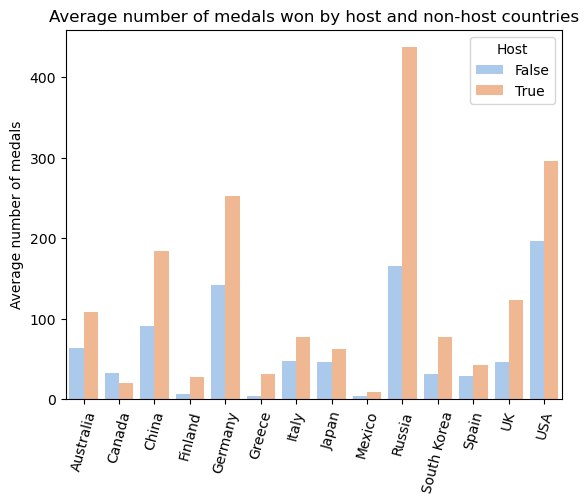

In [92]:
ax = sns.barplot(
    data=df_avg_medals, x="Country", y="has_medal", hue="Host", palette="pastel"
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75)
ax.set_title("Average number of medals won by host and non-host countries")
ax.set_ylabel("Average number of medals")
ax.set_xlabel("")
plt.show()

**Question 7:** <br>
**Display an bar chart showing the distribution of the age for the gold medal winners** <br>
You can use 'sns.countplot' <br>
(Optional Question) Display a better chart with a title, a 'xlabel', a 'ylabel' and display the count over the bar plot.
You can do this with "ax.patches"

In [3]:
dataset[dataset["Medal"] == "Gold"]["Age"].to_frame()

,Age
32,28.0
34,28.0
38,28.0
49,20.0
62,30.0
...,...
206736,23.0
206755,28.0
206761,29.0
206788,31.0


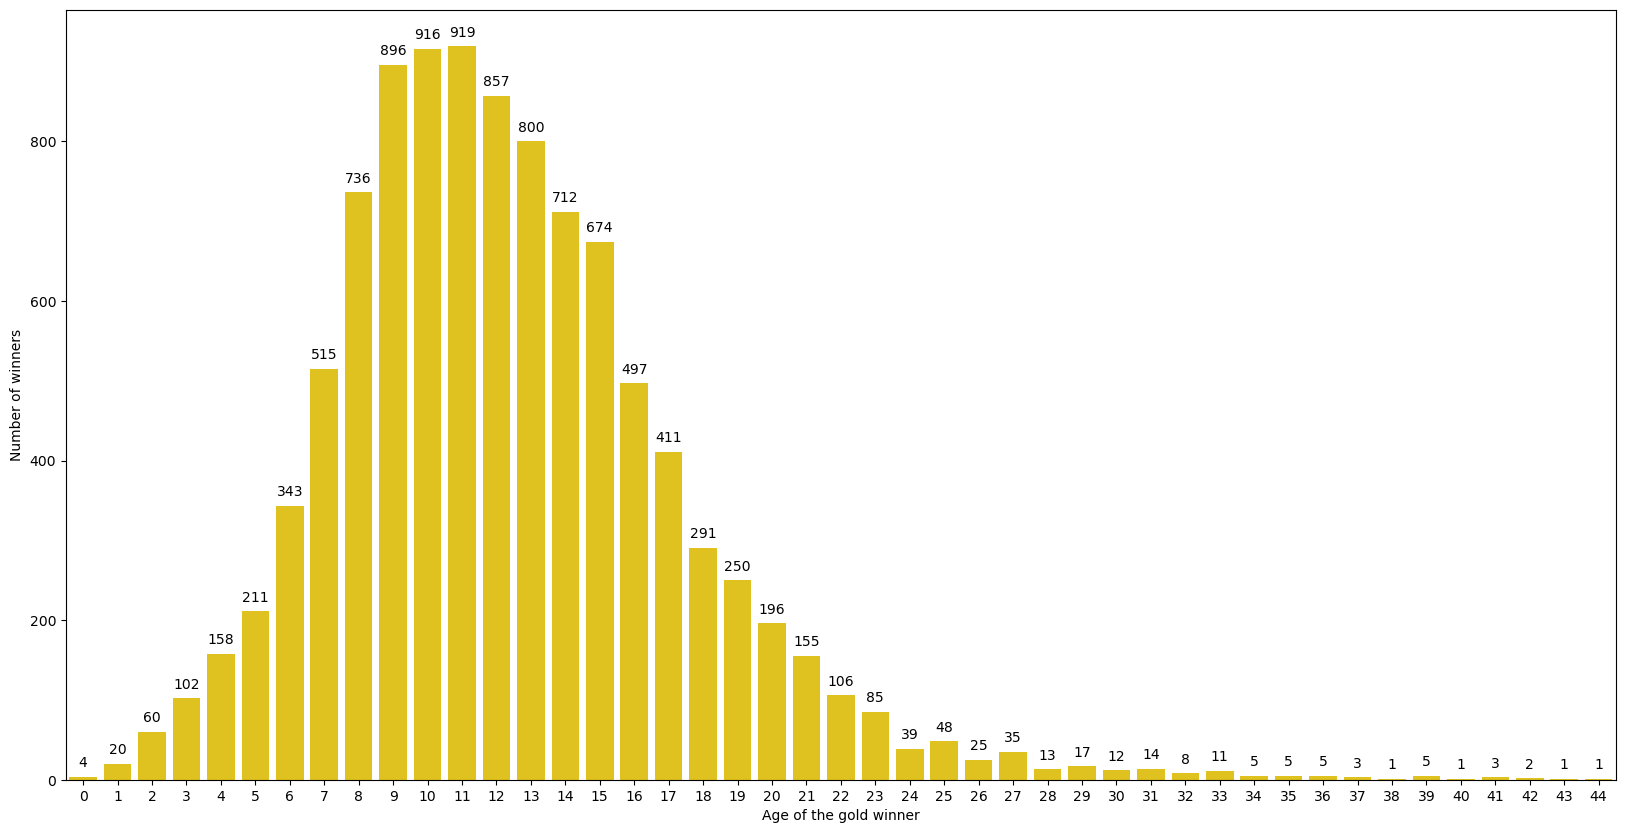

In [94]:
ax = sns.countplot(
    data=dataset[dataset["Medal"] == "Gold"]["Age"].to_frame(),
    x="Age",
    color="#FFD700",  # gold color,
)
ax.set_xlabel("Age of the gold winner")
# format the xlabels to integers
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):d}"))
ax.set_ylabel("Number of winners")
# display the number on top
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )
ax.figure.set_size_inches(20, 10)
plt.show()


**Question 8 (Bonus)**: <br>
**Do host countries win more medals when they are at home?
Display on a plot with sns.scatterplot in black the number of medals won by non-host countries for each edition, and in red for host countries.** <br>
Play with the transparency parameter. (alpha with sns.scatterplot), and the s parameter (dot size).

As a guide, alpha is between 0 and 1.
s should be between 50 and 150.

In [96]:
# compute the number of medals won by every contry on each edition

df_medal_host_countries = (
    (
        df_host_countries[df_host_countries["has_medal"] == True]
        .groupby(["Country", "Games", "Won_host_country"])["has_medal"]
        .count()
    )
    .to_frame()
    .reset_index()
)
df_medal_host_countries

,Country,Games,Won_host_country,has_medal
0,Australia,1952 Summer,False,4
1,Australia,1956 Summer,True,33
2,Australia,1960 Summer,False,42
3,Australia,1964 Summer,False,37
4,Australia,1968 Summer,False,51
...,...,...,...,...
226,USA,2000 Summer,False,241
227,USA,2004 Summer,False,262
228,USA,2008 Summer,False,316
229,USA,2012 Summer,False,248


/var/folders/vw/2kmjpl310zl2lwgnwpxsyw4r0000gn/T/ipykernel_62580/236453984.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70)


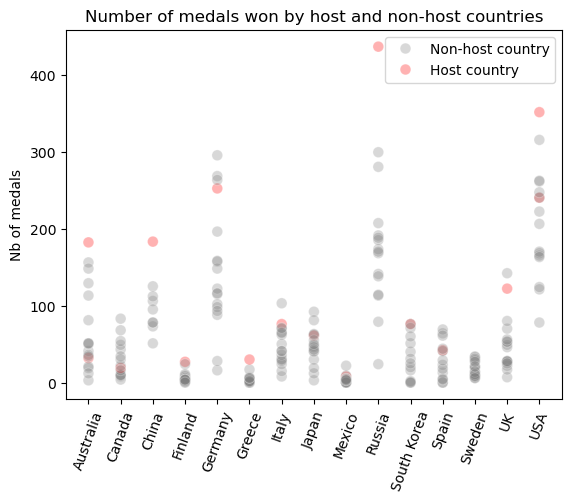

In [115]:
ax = sns.scatterplot(
    data=df_medal_host_countries,
    x="Country",
    y="has_medal",
    hue="Won_host_country",
    s=60,
    alpha=0.3,
    palette=["grey", "red"],
)
# axes lables
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_ylabel("Nb of medals")
ax.set_xlabel("")
# Legend customization
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["Non-host country", "Host country"])
plt.title("Number of medals won by host and non-host countries")
plt.show()

**Question 9 (Bonus)**: <br>
**Display a choropleth map with each order country, where the number of metal for each country is displayed with color.**

*Note: Use plotly's `px.choropleth()` function to make the map interactive with `locationmode='Country'`* <br>

The `locationmode` parameter is used to specify how the locations are defined in plotly's choropleth map. <br>
It determines how Plotly should interpret and match the locations in your data to the actual geographic locations on the map.

You can also display the country map by taking the log10 of the number of medals.

In [122]:
fig = px.choropleth(
    df_medal_host_countries,
    locations="Country",
    locationmode="country names",
    color="has_medal",
    hover_name="Country",
    title="Number of medals won by host and non-host countries",
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## 3. Expert Data visualization

The following question is also optional. Those who will complete it correctly will receive a bonus.

**Question 10 for expert** <br>
Use the folium, branca and geopandas packages to create an interactive map (folium.map).<br>
On this map, when you move the mouse over a country, a small display shows the country, the number of total medals, and the number of gold, silver and bronze medals. <br>
For the shape of the countries, we'll use polygons isssu from the code provided below. <br>

> go to [Real Python - folium](https://realpython.com/python-folium-web-maps-from-data/)

> doc [GitHub](https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson.html)

In [ ]:
!pip install geopandas

In [124]:
from folium.plugins import Search
from folium.plugins import HeatMap
import branca
import folium
from folium import plugins
import geopandas as gpd


# For geographic plotting
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
country_shapes = f"{url}/world-countries.json"
global_polygons = gpd.read_file(country_shapes)
global_polygons.to_file("global_polygons.geojson", driver="GeoJSON")

In [133]:
global_polygons

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.8554, 20.46318 41.51509,..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.2455, 51.75744 24.29407,..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6..."
...,...,...,...
172,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.7825,..."
173,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
174,ZAF,South Africa,"POLYGON ((31.521 -29.25739, 31.32556 -29.40198..."
175,ZMB,Zambia,"POLYGON ((32.75938 -9.2306, 33.23139 -9.67672,..."


In [152]:
# Dataset to create
df_country_medals = (
    dataset[dataset["has_medal"] == True]
    .groupby(["Country", "NOC", "Medal"])["Medal"]
    .value_counts()
    .reset_index()
)
# pivot the Medals
df_country_medals = (
    df_country_medals.pivot_table(
        index=["Country", "NOC"], columns="Medal", values="count"
    )
    .fillna(0)
    .reset_index()
)
df_country_medals["Total"] = (
    df_country_medals["Bronze"]
    + df_country_medals["Gold"]
    + df_country_medals["Silver"]
)

# Merge with the global polygons
df_country_medals = global_polygons.merge(
    df_country_medals, left_on="id", right_on="NOC"
)
df_country_medals

,id,name,geometry,Country,NOC,Bronze,Gold,Silver,Total
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066...",Afghanistan,AFG,2.0,0.0,0.0,2.0
1,ARG,Argentina,"MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6...",Argentina,ARG,78.0,72.0,70.0,220.0
2,ARM,Armenia,"POLYGON ((43.58275 41.09214, 44.97248 41.24813...",Armenia,ARM,8.0,2.0,5.0,15.0
3,AUS,Australia,"MULTIPOLYGON (((145.39798 -40.79255, 146.36412...",Australia,AUS,474.0,319.0,414.0,1207.0
4,AUT,Austria,"POLYGON ((16.97967 48.1235, 16.90375 47.71487,...",Austria,AUT,99.0,75.0,99.0,273.0
...,...,...,...,...,...,...,...,...,...
78,UGA,Uganda,"POLYGON ((31.86617 -1.02736, 30.76986 -1.01455...",Uganda,UGA,2.0,2.0,3.0,7.0
79,UKR,Ukraine,"POLYGON ((31.786 52.10168, 32.15941 52.06127, ...",Ukraine,UKR,97.0,46.0,51.0,194.0
80,USA,United States of America,"MULTIPOLYGON (((-155.54211 19.08348, -155.6881...",USA,USA,982.0,2115.0,1288.0,4385.0
81,UZB,Uzbekistan,"POLYGON ((66.51861 37.36278, 66.54615 37.97468...",Uzbekistan,UZB,17.0,10.0,7.0,34.0


>https://python-visualization.github.io/folium/latest/user_guide/geojson/geojson_popup_and_tooltip.html

In [167]:
# Usefull and style function to built
m = folium.Map(location=(50, 0), zoom_start=3)
# Map_Layer = folium.GeoJson(global_polygons).add_to(m)

# add the choropleth layer on top of the map
# folium.Choropleth(
#     geo_data=global_polygons,
#     data=df_country_medals,
#     columns=["NOC", "count"],
#     key_on="feature.properties.id",
#     fill_color="YlGn",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     nan_fill_color="white",
#     legend_name="Number of medals",
# ).add_to(m)


# Create the popup
# def medals_popup(country_id):
#     """Render the HTML dataset for the country"""
#     df_this_country = df_country_medals[df_country_medals["NOC"] == country_id]
#     html = df_this_country[["Medal", "count"]].to_html()
#     return folium.Popup(html)

# create the colormap
colormap = branca.colormap.LinearColormap(
    vmin=df_country_medals["Total"].quantile(0.0),
    vmax=df_country_medals["Total"].quantile(1),
    colors=["white", "yellow", "green"],
    caption="Number of medals",
)

# create the tooltip, diplayed when hovering over the country
country_tooltip = folium.features.GeoJsonTooltip(
    fields=["name", "Gold", "Silver", "Bronze", "Total"],
    aliases=["Country:", "Gold:", "Silver:", "Bronze:", "Total:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)
# add the countries shape to click on
folium.GeoJson(
    df_country_medals,
    style_function=lambda feature: {
        "fillColor": colormap(feature["properties"]["Total"])
        if feature["properties"]["Total"]
        else "transparent",
        "color": "black",
        "weight": 0.5,
        "dashArray": "5, 5",
        "fillOpacity": 0.5,
    },
    highlight_function=lambda feature: {
        "color": "red",
        "weight": 2,
    },
    tooltip=country_tooltip,
    # popup=medals_popup(country_id=lambda feature: feature["properties"]["id"]),
    zoom_on_click=False,
).add_to(m)
colormap.add_to(m)
m

In [ ]:
plugins.Search(  ## To complete
).add_to(m)


In [168]:
# add a minimap
minimap = plugins.MiniMap()
m.add_child(minimap)
folium.LayerControl().add_to(m)
colormap.add_to(m)
m

In [146]:
df_this_country = df_country_medals[df_country_medals["NOC"] == "FRA"]
df_this_country[["Medal", "count"]].to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>Medal</th>\n      <th>count</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>101</th>\n      <td>Bronze</td>\n      <td>375</td>\n    </tr>\n    <tr>\n      <th>102</th>\n      <td>Gold</td>\n      <td>285</td>\n    </tr>\n    <tr>\n      <th>103</th>\n      <td>Silver</td>\n      <td>327</td>\n    </tr>\n  </tbody>\n</table>'

**Now you can display other graphs as you see fit.**